In [4]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

In [7]:
df = pd.read_csv('titanicfinal.csv',usecols=['Sex'])

## One Hot Encoding

In [6]:
df

,Sex
0,male
1,female
2,female
3,female
4,male
...,...
886,male
887,female
888,female
889,male


In [10]:
### In one hot encoding, we just use get_dummies
pd.get_dummies(df,drop_first=True)

,Sex_male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [2]:
df = pd.read_csv('titanicfinal.csv',usecols = ['Embarked'])

In [3]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [8]:
df.dropna(inplace=True)

In [10]:
df.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [12]:
pd.get_dummies(df,drop_first=True)

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


## Ordinal Number Encoding 

In [2]:
import datetime as datetime

In [3]:
today_date = datetime.datetime.today()

In [4]:
today_date-datetime.timedelta(3)

datetime.datetime(2023, 2, 3, 18, 55, 48, 691575)

#### to understand this better, we're creating 15 days worth of dates, and making a list comprehension of these dates

In [5]:
days = [today_date-datetime.timedelta(x) for x in range(0,15)]

In [6]:
import pandas as pd
data = pd.DataFrame(days)
data.columns=['Date']

In [9]:
data['weekday'] = data['Date'].dt.strftime('%A')

In [10]:
data

,Date,weekday
0,2023-02-06 18:55:48.691575,Monday
1,2023-02-05 18:55:48.691575,Sunday
2,2023-02-04 18:55:48.691575,Saturday
3,2023-02-03 18:55:48.691575,Friday
4,2023-02-02 18:55:48.691575,Thursday
5,2023-02-01 18:55:48.691575,Wednesday
6,2023-01-31 18:55:48.691575,Tuesday
7,2023-01-30 18:55:48.691575,Monday
8,2023-01-29 18:55:48.691575,Sunday
9,2023-01-28 18:55:48.691575,Saturday


In [13]:
diction = {'Monday':1, 'Sunday':7, 'Saturday':6, 'Friday':5, 'Thursday':4, 'Wednesday':3,
       'Tuesday':2}

In [15]:
data['ordinal_weekdays'] = data['weekday'].map(diction)

In [16]:
data

,Date,weekday,ordinal_weekdays
0,2023-02-06 18:55:48.691575,Monday,1
1,2023-02-05 18:55:48.691575,Sunday,7
2,2023-02-04 18:55:48.691575,Saturday,6
3,2023-02-03 18:55:48.691575,Friday,5
4,2023-02-02 18:55:48.691575,Thursday,4
5,2023-02-01 18:55:48.691575,Wednesday,3
6,2023-01-31 18:55:48.691575,Tuesday,2
7,2023-01-30 18:55:48.691575,Monday,1
8,2023-01-29 18:55:48.691575,Sunday,7
9,2023-01-28 18:55:48.691575,Saturday,6


## Count or Frequency Encoding

In [19]:
train_set = pd.read_csv('adult.data',header=None,index_col = None)

In [20]:
train_set.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [22]:
train_set[1].nunique()

9

In [28]:
train_set = train_set.select_dtypes(exclude=[np.number])

In [30]:
train_set.columns = ['Employee','Education','Status','Desgination','Relation','Race','Gender','Location','Salary']

In [35]:
for features in train_set.columns:
    print(features,'has:',len(train_set[features].unique()))

Employee has: 9
Education has: 16
Status has: 7
Desgination has: 15
Relation has: 6
Race has: 5
Gender has: 2
Location has: 42
Salary has: 2


#### Country has multiple labels - you can use random imputation, count of frequency etc.

In [38]:
location = train_set['Location'].value_counts().to_dict()

In [40]:
train_set['locationmap'] = train_set.Location.map(location)

In [41]:
train_set

,Employee,Education,Status,Desgination,Relation,Race,Gender,Location,Salary,locationmap
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K,29170
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K,29170
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K,29170
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K,29170
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K,95
...,...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K,29170
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K,29170
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K,29170
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K,29170


## Target guided ordinal encoding 
1. ordering the labels according to the target
2. or we may replace the labels by the joint probability being 1 or 0]

In [3]:
import pandas as pd 
import numpy as np

In [4]:
df = pd.read_csv('titanicfinal.csv',usecols = ['Cabin','Survived'])

In [5]:
df

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN
...,...,...
886,0,NaN
887,1,B42
888,0,NaN
889,1,C148


In [6]:
df.Cabin.fillna('Missing',inplace=True)

In [7]:
 df.Cabin.unique() #taking just the letters will make more sense 

array(['Missing', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62

In [8]:
df['Cabin'] = df['Cabin'].astype(str).str[0]

In [10]:
df.head(10) #M -> missing 

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M
5,0,M
6,0,E
7,0,M
8,1,M
9,1,M


In [18]:
freq_labels = df.groupby(['Cabin'])['Survived'].mean().sort_values().index
freq_labels
## the probability of a person in cabin A surviving is 46 percent, and so on

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

#### based on the target variable Survived, sorting the mean and taking the indexes
- enumerate(freq_labels,0) will give each k in frequent labels{meaning T to D] a rank from 0 onwards

In [23]:
ordinal_labels = {k:i for i,k in enumerate(freq_labels,0)} 

In [24]:
df['ordinal_labels'] = df['Cabin'].map(ordinal_labels)

In [26]:
df.head(10) #these are based on the target values

,Survived,Cabin,ordinal_labels
0,0,M,1
1,1,C,4
2,1,M,1
3,1,C,4
4,0,M,1
5,0,M,1
6,0,E,7
7,0,M,1
8,1,M,1
9,1,M,1


## Mean Encoding 

In [28]:
meanencoding = df.groupby(['Cabin'])['Survived'].mean().to_dict()

In [30]:
df['meanencoding'] = df['Cabin'].map(meanencoding)

In [32]:
df.head(10)

,Survived,Cabin,ordinal_labels,meanencoding
0,0,M,1,0.299854
1,1,C,4,0.593220
2,1,M,1,0.299854
3,1,C,4,0.593220
4,0,M,1,0.299854
5,0,M,1,0.299854
6,0,E,7,0.750000
7,0,M,1,0.299854
8,1,M,1,0.299854
9,1,M,1,0.299854


## Probability Ratio Encoding

In [2]:
df = pd.read_csv('titanicfinal.csv',usecols = ['Cabin','Survived'])

In [3]:
df.Cabin.fillna('Missing',inplace=True)

In [4]:
df['Cabin'] = df['Cabin'].astype(str).str[0]

- find out the percentage of the survived based on this particular cabin

In [5]:
pbratio = df.groupby(['Cabin'])['Survived'].mean()

In [8]:
prob_df = pd.DataFrame(pbratio)

In [10]:
prob_df['Died'] = 1-prob_df['Survived']

In [12]:
prob_df['Ratio'] = prob_df['Survived']/prob_df['Died']

In [13]:
prob_df

,Survived,Died,Ratio
Cabin,,,
A,0.466667,0.533333,0.875000
B,0.744681,0.255319,2.916667
C,0.593220,0.406780,1.458333
D,0.757576,0.242424,3.125000
E,0.750000,0.250000,3.000000
F,0.615385,0.384615,1.600000
G,0.500000,0.500000,1.000000
M,0.299854,0.700146,0.428274
T,0.000000,1.000000,0.000000


In [14]:
prob_diction = prob_df.Ratio.to_dict()

In [15]:
prob_diction

{'A': 0.875,
 'B': 2.916666666666666,
 'C': 1.4583333333333333,
 'D': 3.125,
 'E': 3.0,
 'F': 1.6000000000000003,
 'G': 1.0,
 'M': 0.42827442827442824,
 'T': 0.0}

In [16]:
df['Cabin_Ratio'] = df['Cabin'].map(prob_diction)

In [18]:
df.head(20)

,Survived,Cabin,Cabin_Ratio
0,0,M,0.428274
1,1,C,1.458333
2,1,M,0.428274
3,1,C,1.458333
4,0,M,0.428274
5,0,M,0.428274
6,0,E,3.000000
7,0,M,0.428274
8,1,M,0.428274
9,1,M,0.428274


# FEATURE TRANSFORMATION

#### a) TRYING TO LEARN HOW TO IMPLEMENT TRANSFORM, FIT TRANSFORM ETC.
FIND THE REFERENCE OF THIS CODE HERE: https://www.youtube.com/watch?v=BotYLBQfd5M

In [48]:
import pandas as pd 
import numpy as np

In [49]:
df = pd.read_csv('titanicfinal.csv',usecols = ['Pclass','Age','Fare','Survived'])

In [50]:
df.head(5)

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [51]:
df.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

In [52]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [53]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [54]:
X = df.iloc[:,1:]
y = df.iloc[:,:1]

In [55]:
from sklearn.model_selection import train_test_split
# remember! train test split is applied so we don't face overfitting problems 

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=0)

In [62]:
X_train.mean()

Pclass     2.288591
Age       29.465604
Fare      32.478663
dtype: float64

In [61]:
X_test.mean()

Pclass     2.349153
Age       29.151424
Fare      31.649717
dtype: float64

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [67]:
X_train_scaled

array([[-0.34363182, -0.03598323, -0.45510318],
       [-0.34363182,  0.50499701, -0.4033367 ],
       [-1.53435605,  2.43706929,  0.02114842],
       ...,
       [ 0.8470924 , -0.11326612, -0.51239211],
       [ 0.8470924 ,  0.50499701, -0.3122277 ],
       [-0.34363182,  2.3597864 ,  0.13503467]])

In [68]:
X_test_scaled = scaler.transform(X_test)

In [69]:
X_test_scaled

array([[ 8.47092403e-01, -1.13266116e-01, -3.73140283e-01],
       [ 8.47092403e-01, -1.13266116e-01, -5.16187627e-01],
       [ 8.47092403e-01, -1.73620683e+00, -6.94429204e-02],
       [-1.53435605e+00, -1.13266116e-01,  2.36142393e+00],
       [ 8.47092403e-01, -3.59832253e-02, -3.56833842e-01],
       [-1.53435605e+00, -1.13266116e-01, -4.09713574e-02],
       [-1.53435605e+00,  8.14128577e-01,  2.50516287e+00],
       [-1.53435605e+00,  1.18582557e-01,  2.74130498e+00],
       [-1.53435605e+00, -3.45114790e-01,  1.21341738e+00],
       [ 8.47092403e-01, -1.13266116e-01, -5.22830301e-01],
       [ 8.47092403e-01, -2.67831899e-01, -5.09888682e-01],
       [-3.43631824e-01,  8.14128577e-01, -4.03336705e-01],
       [ 8.47092403e-01, -1.13266116e-01, -5.12046309e-01],
       [-3.43631824e-01, -1.73620683e+00, -1.28974370e-01],
       [-1.53435605e+00, -4.22397681e-01,  1.04940254e+00],
       [ 8.47092403e-01, -1.19522659e+00, -5.09888682e-01],
       [ 8.47092403e-01, -4.99680572e-01

## model building 
#### .fit() for training data, and .predict() for testing data

In [71]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression()

In [73]:
classification.fit(X_train_scaled,y_train)

/Users/anushkasharma/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [75]:
classification.predict(X_test_scaled)

array([0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0])

## 1) Standardization

In [5]:
import pandas as pd 
import numpy as np

In [6]:
df = pd.read_csv('titanicfinal.csv',usecols = ['Pclass','Age','Fare','Survived'])

In [7]:
df.head(5)

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [8]:
df.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

In [9]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [10]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [9]:
pd.DataFrame(df_scaled) #0-3 are the columns from df

,0,1,2,3
0,-0.789272,0.827377,-0.565736,-0.502445
1,1.266990,-1.566107,0.663861,0.786845
2,1.266990,0.827377,-0.258337,-0.488854
3,1.266990,-1.566107,0.433312,0.420730
4,-0.789272,0.827377,0.433312,-0.486337
...,...,...,...,...
886,-0.789272,-0.369365,-0.181487,-0.386671
887,1.266990,-1.566107,-0.796286,-0.044381
888,-0.789272,0.827377,-0.104637,-0.176263
889,1.266990,-1.566107,-0.258337,-0.044381


In [10]:
import matplotlib.pyplot as plt 
%matplotlib inline 

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.64842165, -0.13264224,  0.38313716,  0.89891657,  1.41469598,
         1.93047539,  2.4462548 ,  2.96203421,  3.47781362,  3.99359303,
         4.50937244,  5.02515184,  5.54093125,  6.05671066,  6.57249007,
         7.08826948,  7.60404889,  8.1198283 ,  8.63560771,  9.15138712,
         9.66716653]),
 <BarContainer object of 20 artists>)

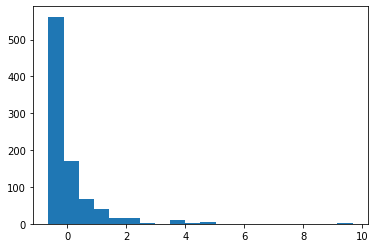

In [19]:
plt.hist(df_scaled[:,3],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  25.61646,  51.23292,  76.84938, 102.46584, 128.0823 ,
        153.69876, 179.31522, 204.93168, 230.54814, 256.1646 , 281.78106,
        307.39752, 333.01398, 358.63044, 384.2469 , 409.86336, 435.47982,
        461.09628, 486.71274, 512.3292 ]),
 <BarContainer object of 20 artists>)

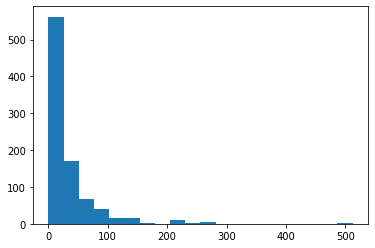

In [18]:
plt.hist(df['Fare'],bins=20)

## 2) MinMax Scaling
- most popularly used in CNN's.
- MinMax scaling transforms the values/scales the values between 0 and 1.
- X_scaled = (X-Xmin)/(Xmax-Xmin)

In [22]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
df_minmax = pd.DataFrame(minmax.fit_transform(df),columns=df.columns)

In [24]:
df_minmax #each value got converted to either 0 or 1

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713
...,...,...,...,...
886,0.0,0.5,0.334004,0.025374
887,1.0,0.0,0.233476,0.058556
888,0.0,1.0,0.346569,0.045771
889,1.0,0.0,0.321438,0.058556


In [ ]:
plt.hist

(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

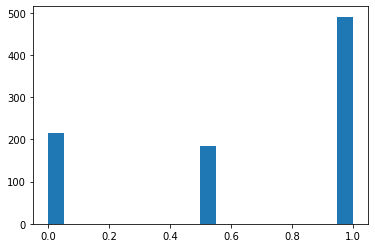

In [26]:
plt.hist(df_minmax['Pclass'],bins=20)

## 3) Robust Scaler 
- it is used to scale the feature to median and quartiles
- subtracting median from all the observations, and then dividing by the IQR [Q3-Q1]
- X_robust = X-X_median/IQR

In [27]:
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()

In [30]:
df_robust = pd.DataFrame(robust_scaler.fit_transform(df),columns=df.columns)

In [31]:
df_robust

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363
...,...,...,...,...
886,0.0,-1.0,-0.076923,-0.062981
887,1.0,-2.0,-0.692308,0.673281
888,0.0,0.0,0.000000,0.389604
889,1.0,-2.0,-0.153846,0.673281


## 4) Gaussian Distribution

In [12]:
import pandas as pd 
import numpy as np

In [13]:
df = pd.read_csv('titanicfinal.csv',usecols=['Age','Fare','Survived'])

In [14]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [15]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [16]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

### if we want to check whether a feature is normally distributed, we use for Q-Q plot.

In [20]:
import scipy.stats as stats
import pylab
import matplotlib.pyplot as plt 
%matplotlib inline

In [21]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stats.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

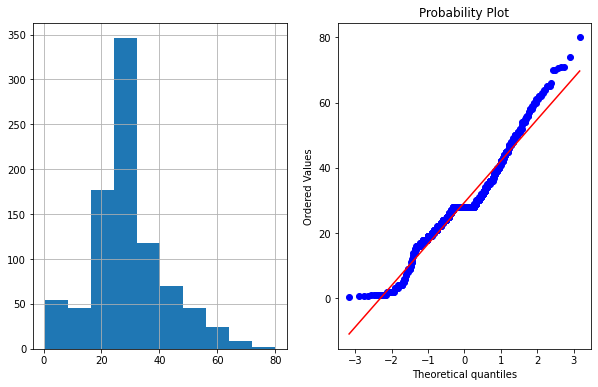

In [22]:
plot_data(df,'Age')

## 4.1) Logarithmic Transformation

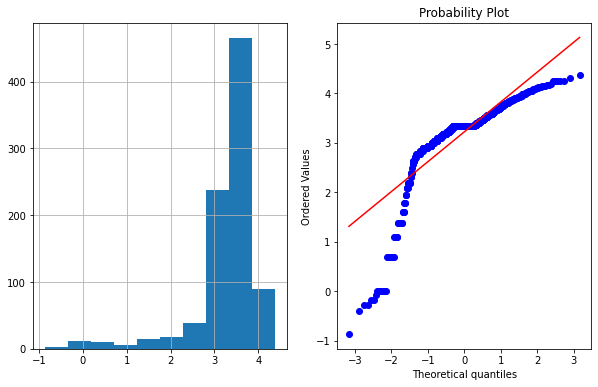

In [24]:
df['Age_log'] = np.log(df['Age'])
plot_data(df,'Age_log')

## 4.2) Reciprocal Transformation

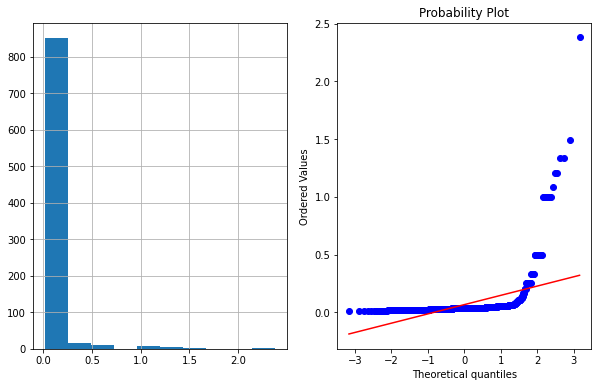

In [28]:
df['Age_reciprocal'] = 1/df['Age']
plot_data(df,'Age_reciprocal')
# notice that this is also not giving a very accurate answer, straight line is not the result.

## 4.3) Square Root Transformation

In [29]:
df['Age_sqroot'] = df['Age']**(1/2)

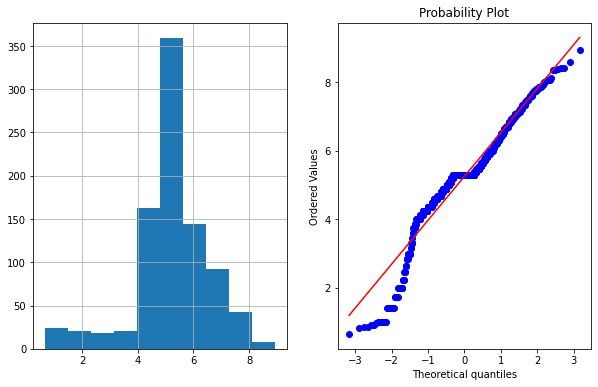

In [31]:
plot_data(df,'Age_sqroot')

## 4.4) Exponential Transformation

In [35]:
df['Age_exponential'] = np.exp(df['Age'])

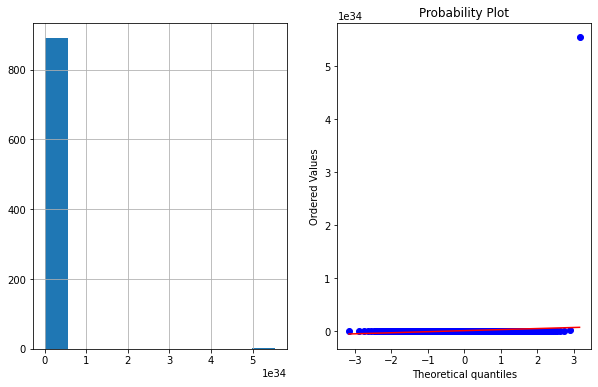

In [36]:
plot_data(df,'Age_exponential')

## 4.5) Box Cox Transformation

In [45]:
df['Age_boxcox'],parameters = stats.boxcox(df['Age'])

In [46]:
parameters

0.7964531473656952

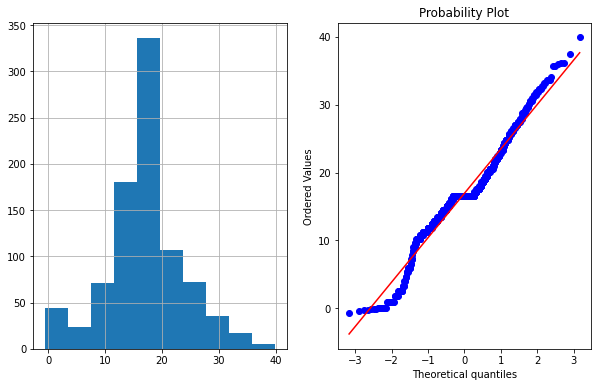

In [47]:
plot_data(df,'Age_boxcox')

### taking care of fare

In [54]:
df['Fare_log'] = np.log1p(df['Fare'])

In [55]:
df['Fare_boxcox'],parameters = stats.boxcox(df['Fare'])

ValueError: Data must be positive.